In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**comparison of different REINFORCE algorithm**

REINFORCE vanilla

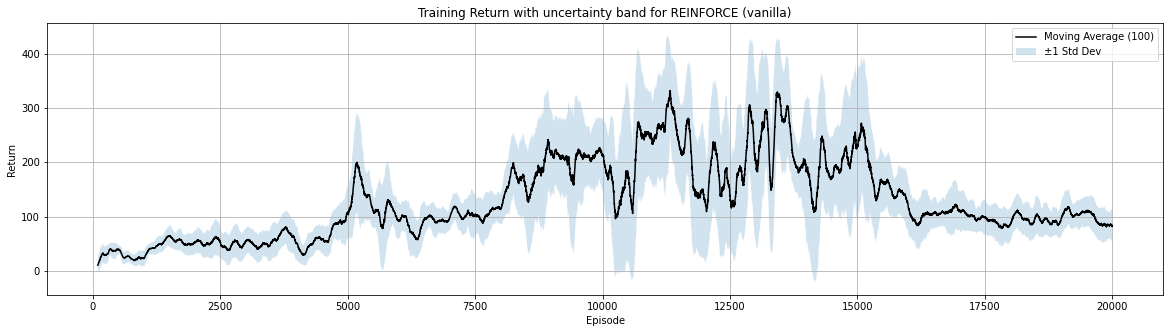

In [13]:
csv_path = "vanilla_seed_42_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for REINFORCE (vanilla)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df = pd.read_csv("REINFORCE_seed_42_test_returns.csv")
df.mean(), df.std()

(return    85.237924
 dtype: float64,
 return    28.130465
 dtype: float64)

REINFORCE with Baseline AVG

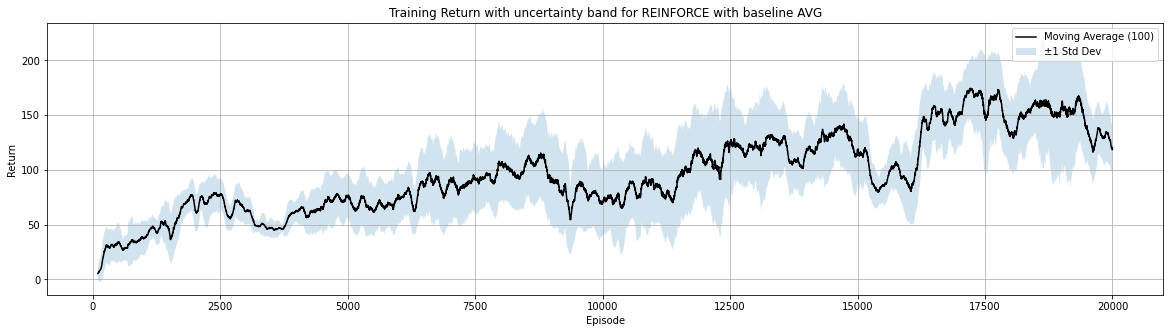

In [12]:
csv_path = "bavg_seed_42_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for REINFORCE with baseline AVG")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
df = pd.read_csv("REINFORCE_BAVG_seed_42_test_returns.csv")
df.mean(), df.std()

(return    123.131195
 dtype: float64,
 return    20.563007
 dtype: float64)

REINFORCE with Baseline Value-Net

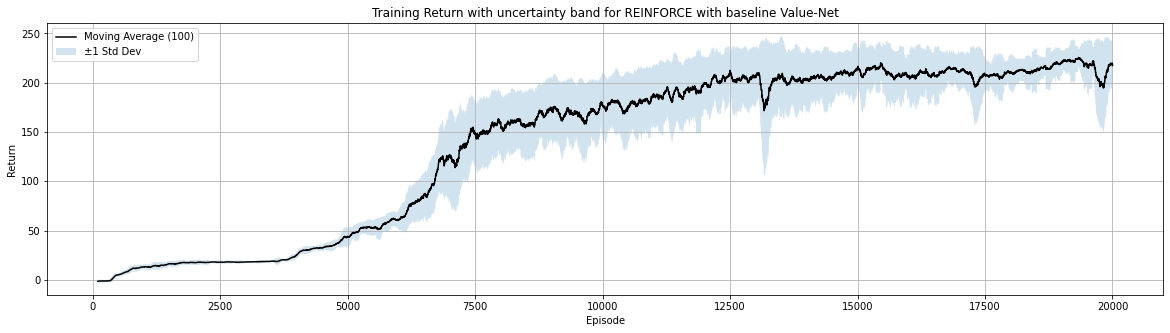

In [11]:
csv_path = "bval_seed_42_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for REINFORCE with baseline Value-Net")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
df = pd.read_csv("REINFORCE_BVAL_seed_42_test_returns.csv")
df.mean(), df.std()

(return    226.26962
 dtype: float64,
 return    9.421261
 dtype: float64)

**Actor-Critic**

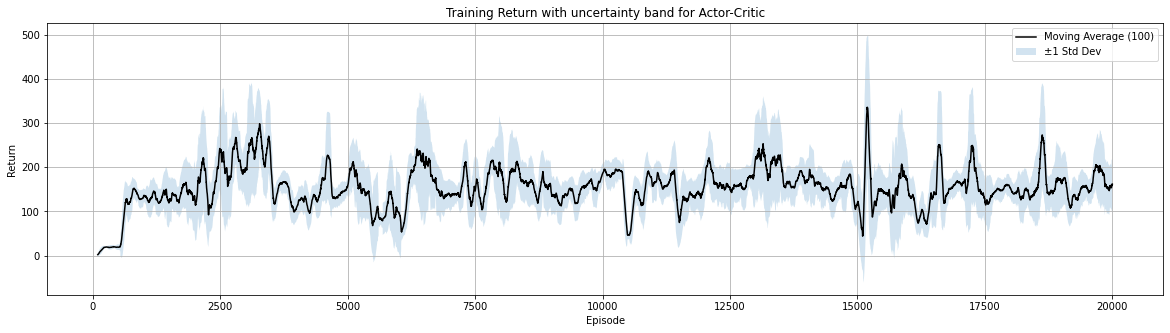

In [27]:
csv_path = "ac_seed_42_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for Actor-Critic")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
df = pd.read_csv("ActorCritic_seed_42_test_returns.csv")
df.mean(), df.std()

(return    198.152347
 dtype: float64,
 return    7.960681
 dtype: float64)

**PPO**

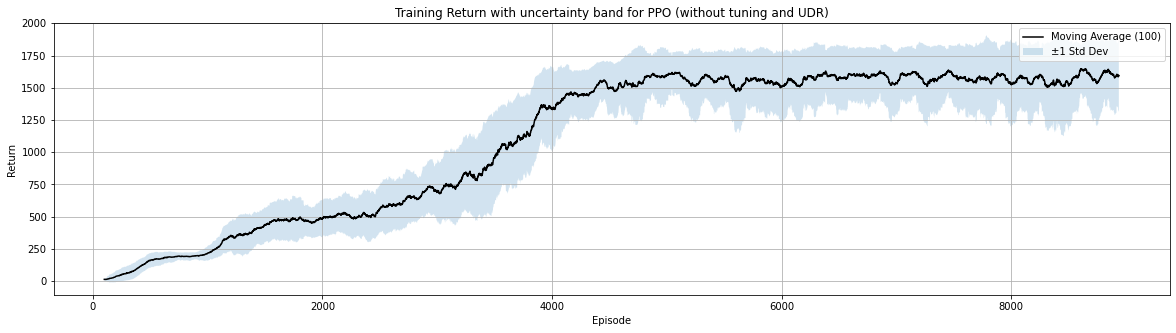

In [35]:
csv_path = "ppo_source_seed_42_UDR_False_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for PPO (without tuning and UDR)")
plt.legend()
plt.grid(True)
plt.show()

**Comparison REINFORCE-ActorCritic-PPO**

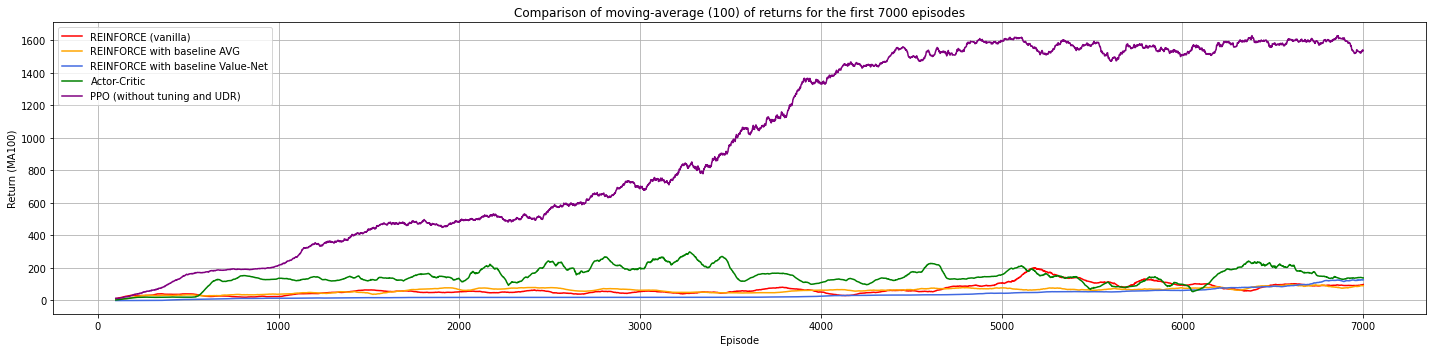

In [39]:
window   = 100         
max_ep   = 7000        
csv_bval   = "bval_seed_42_returns.csv"
csv_ppo  = "ppo_source_seed_42_UDR_False_returns.csv"
csv_v = "vanilla_seed_42_returns.csv"
csv_bavg = "bavg_seed_42_returns.csv"
csv_ac = "ac_seed_42_returns.csv"

bval = pd.read_csv(csv_bval)
bval = bval[bval["episode"] <= max_ep]                      # taglia a 6000 episodi
bval["ma"] = bval["return"].rolling(window).mean()        # moving-average

ppo = pd.read_csv(csv_ppo)
ppo = ppo[ppo["episode"] <= max_ep]
ppo["ma"] = ppo["return"].rolling(window).mean()

v = pd.read_csv(csv_v)
v = v[v["episode"] <= max_ep]
v["ma"] = v["return"].rolling(window).mean()

bavg = pd.read_csv(csv_bavg)
bavg = bavg[bavg["episode"] <= max_ep]
bavg["ma"] = bavg["return"].rolling(window).mean()

ac = pd.read_csv(csv_ac)
ac = ac[ac["episode"] <= max_ep]
ac["ma"] = ac["return"].rolling(window).mean()

plt.figure(figsize=(20, 5))

plt.plot(v["episode"], v["ma"], label="REINFORCE (vanilla)",                color="red")
plt.plot(bavg["episode"], bavg["ma"], label="REINFORCE with baseline AVG",                color="orange")
plt.plot(bval["episode"],  bval["ma"],  label="REINFORCE with baseline Value-Net", color="royalblue")
plt.plot(ac["episode"],  ac["ma"],  label="Actor-Critic", color="green")
plt.plot(ppo["episode"], ppo["ma"], label="PPO (without tuning and UDR)",                color="purple")


plt.xlabel("Episode")
plt.ylabel(f"Return (MA{window})")
plt.title(f"Comparison of moving-average ({window}) of returns for the first {max_ep} episodes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Comparison PPO with UDR and without**

Best parameters found for PPO:

    gamma          : 0.99
    learning_rate  : 3e-4

Best parameters found for UDR:

    body 2: [0.90, 1.10]
    body 3: [0.90, 1.10]
    body 4: [0.50, 1.50]

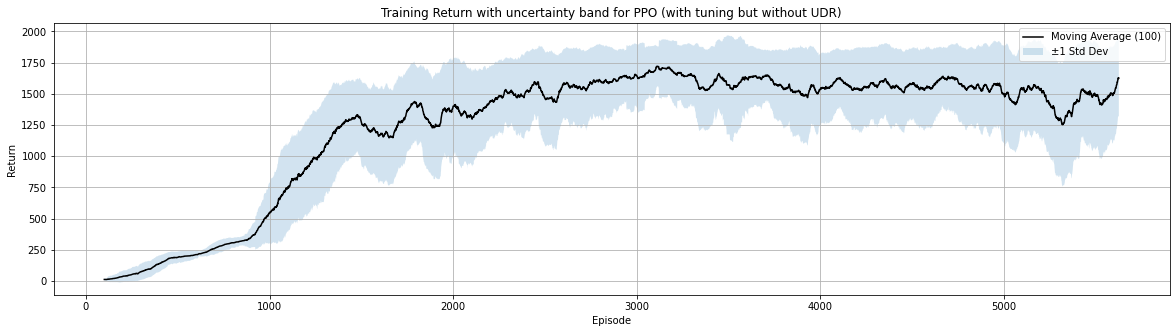

In [43]:
csv_path = "ppo_tuned_source_seed_42_UDR_False_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for PPO (with tuning but without UDR)")
plt.legend()
plt.grid(True)
plt.show()

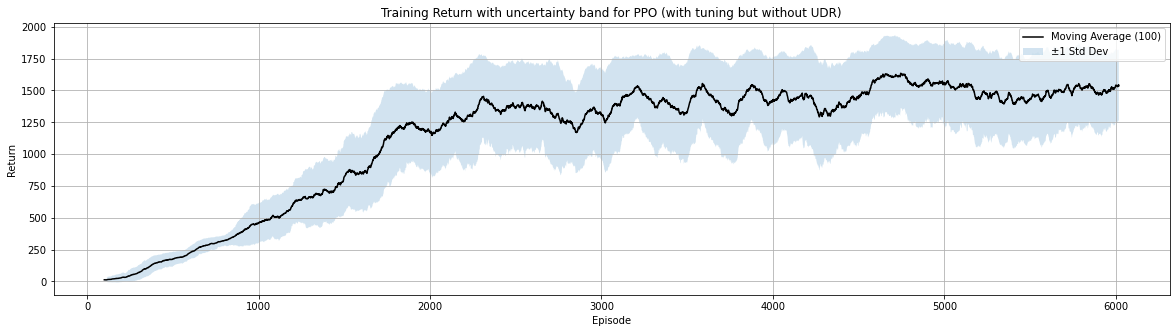

In [53]:
csv_path = "ppo_tuned_target_seed_42_UDR_False_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for PPO (with tuning but without UDR)")
plt.legend()
plt.grid(True)
plt.show()

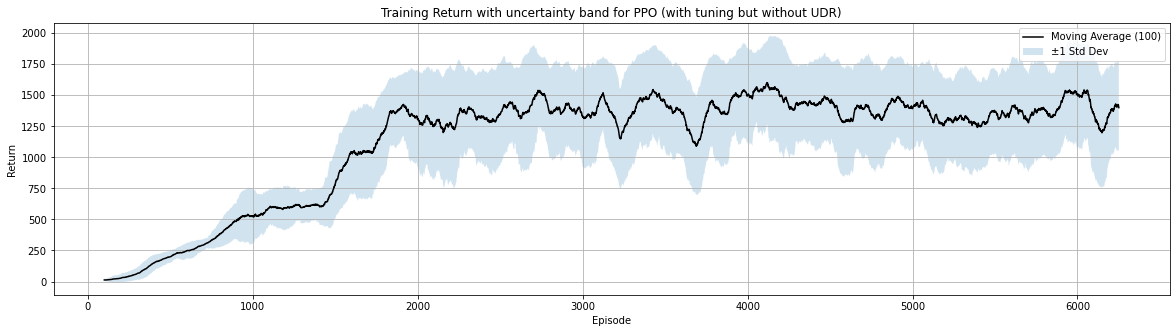

In [68]:
csv_path = "ppo_tuned_source_seed_42_UDR_True_returns.csv"

df = pd.read_csv(csv_path)

window = 100
rolling_mean = df["return"].rolling(window=window).mean()
rolling_std = df["return"].rolling(window=window).std()

plt.figure(figsize=(20, 5))
plt.plot(df["episode"], rolling_mean, label="Moving Average (100)", color="black")

# Banda di confidenza ±1 std
plt.fill_between(
    df["episode"],
    rolling_mean - rolling_std,
    rolling_mean + rolling_std,
    alpha=0.2,
    label="±1 Std Dev"
)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Training Return with uncertainty band for PPO (with tuning but without UDR)")
plt.legend()
plt.grid(True)
plt.show()

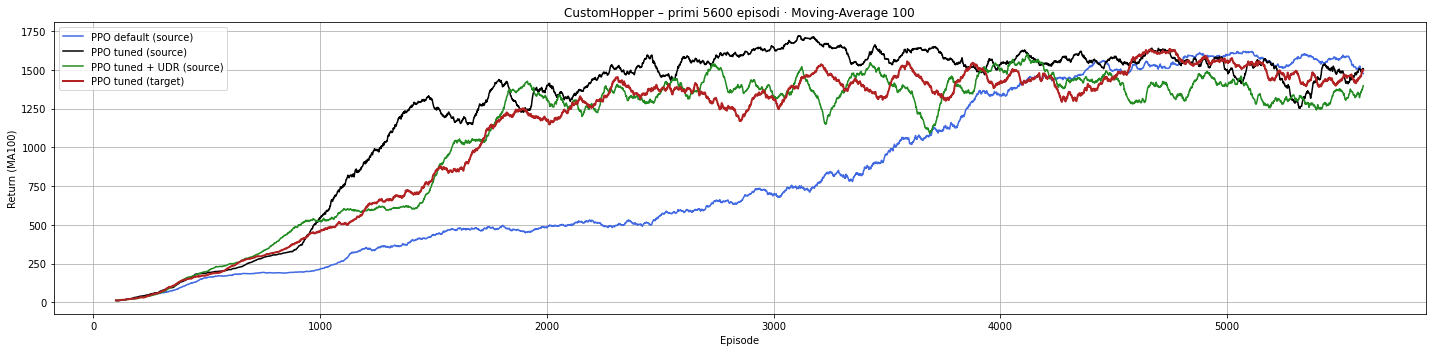

In [69]:

# ----------------------------------------
# Configurazione
window      = 100
max_ep      = 5600
csv_default = "ppo_source_seed_42_UDR_False_returns.csv"
csv_tuned_s = "ppo_tuned_source_seed_42_UDR_False_returns.csv"
csv_tuned_u = "ppo_tuned_source_seed_42_UDR_True_returns.csv"
csv_tuned_t = "ppo_tuned_target_seed_42_UDR_False_returns.csv"
# ----------------------------------------

def load_and_roll(csv):
    df        = pd.read_csv(csv)
    df        = df[df["episode"] <= max_ep]
    df["ma"]  = df["return"].rolling(window).mean()
    df["std"] = df["return"].rolling(window).std()
    return df

df_def  = load_and_roll(csv_default)
df_tsrc = load_and_roll(csv_tuned_s)
df_tudr = load_and_roll(csv_tuned_u)
df_ttar = load_and_roll(csv_tuned_t)

# --------------- Plot -------------------
plt.figure(figsize=(20, 5))

# PPO default (source)
plt.plot(df_def["episode"], df_def["ma"],
         label="PPO default (source)", color="royalblue")


# PPO tuned (source)
plt.plot(df_tsrc["episode"], df_tsrc["ma"],
         label="PPO tuned (source)", color="black")


# PPO tuned + UDR (source)
plt.plot(df_tudr["episode"], df_tudr["ma"],
         label="PPO tuned + UDR (source)", color="forestgreen")


# PPO tuned (target) – solo MA
plt.plot(df_ttar["episode"], df_ttar["ma"],
         label="PPO tuned (target)", color="firebrick", linewidth=2.0)

# Finalizzazione grafico
plt.xlabel("Episode")
plt.ylabel(f"Return (MA{window})")
plt.title(f"CustomHopper – primi {max_ep} episodi · Moving-Average {window}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





*source -> source* 

*source -> target*

*source + UDR -> source*

*source + UDR -> source + UDR*

*source  + UDR -> target*

*target -> target*


**Comparison PPO with UDR and extension**